# XEFI
### An example of generating a basic XEFI for a mutlilayer interface.

In [1]:
import XEFI
import kkcalc as kk
import numpy as np

c:\Github\XEFI\XEFI\models\results.py:292: SyntaxWarning: invalid escape sequence '\c'
  I(z) = |E(z)|^2 = E(z) \cdot E^*(z)


In [2]:
refractive_db = kk.models.asp_db_complex
# refractive_air = refractive_db("N2")
refractive_air = 1.0 + 0j
refractive_P3HT = refractive_db("C10H14S", density=1.33, name="P3HT")
refractive_PS = refractive_db("C8H8", density=1.05, name="PS")
refractive_Si = refractive_db("Si", density=2.329, name="Si")

C:\Github\kkcalc\build\__editable__.kkcalc-0.8.0-py3-none-any\kkcalc\models\common.py:402: UserWarning: Setting a formula mass will not be internally used when a `stoichiometry` has been assigned.
  warnings.warn(
C:\Github\kkcalc\build\__editable__.kkcalc-0.8.0-py3-none-any\kkcalc\models\polynomials.py:1912: UserWarning: When generating `asp_complex`, the energy intervals of real (10.00, 30000.00) and imaginary (10.00, 500000.00) components don't match.
  warnings.warn(
C:\Github\kkcalc\build\__editable__.kkcalc-0.8.0-py3-none-any\kkcalc\models\polynomials.py:1931: UserWarning: Real energies are a subset of imaginary energies, truncating imaginary energies to match real.
  warnings.warn(
C:\Github\kkcalc\build\__editable__.kkcalc-0.8.0-py3-none-any\kkcalc\models\polynomials.py:624: UserWarning: (ASP 'P3HT'(511 en segments, 5 coefficients.)) Energies have changed length. Coefficients set to `None`.
  warnings.warn(
C:\Github\kkcalc\build\__editable__.kkcalc-0.8.0-py3-none-any\kkcalc\mo

In [ ]:
# Define some system parameters
beam_energy = (XEFI.models.basic.en2wav) / 1.54  # in eV
print(f"{beam_energy:0.2f} eV")
beam_energy = 8050.92
# beam_energy = 2450  # in eV
angles = np.linspace(0.1, 0.8, 3000)  # in degrees

z = [
    0,
    # -600,
    -800,
    # -900,
    # -1200,
]  # Define the z-coordinates for the multilayer interface

refractive_indicies: list[kk.models.asp_complex] = [
    refractive_air,
    refractive_PS,
    # refractive_P3HT,
    refractive_Si,
    # refractive_Si,
]  #
labels = ["Air"] + [ref.name for ref in refractive_indicies[1:]]

8050.92 eV


wave layer 0	 [0.00720403+0.j]
wave layer 1	 [9.94352616e-06+0.00829665j]
wave layer 2	 [5.44137012e-05+0.01012581j]
wave layer 3	 [0.00020283+0.01415391j]


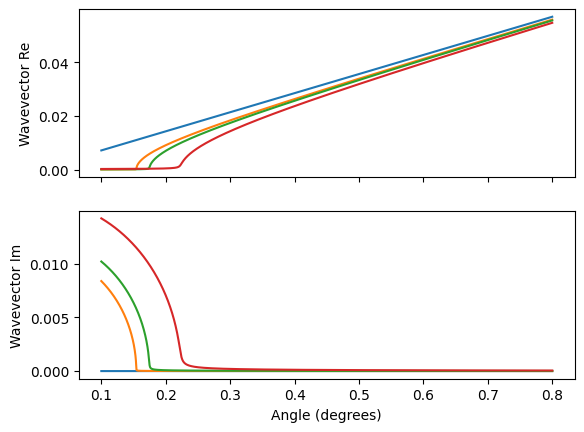

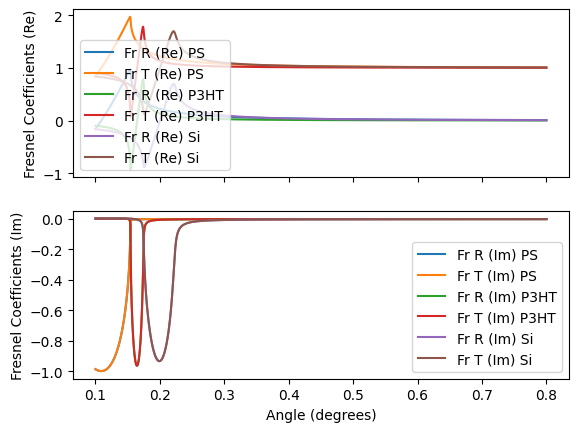

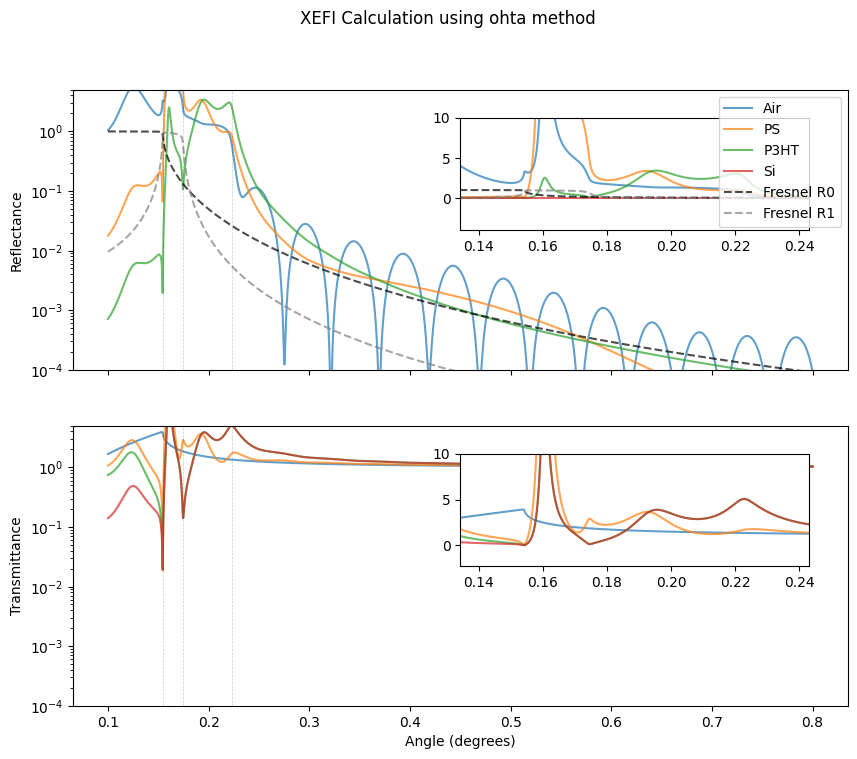

In [13]:
result = XEFI.XEF(
    energies=beam_energy,
    angles=angles,
    z=z,
    refractive_indices=refractive_indicies,
    # z_roughness=[10, 10, 10],
    layer_names=labels,
    method=XEFI.XEF_method.ohta,
    # method=XEFI.XEF_method.dev
    # method=XEFI.XEF_method.tolan
)

The Expected Result from Toland for 800 Angstrom, Copper-Kalpha wavelength (~8keV).
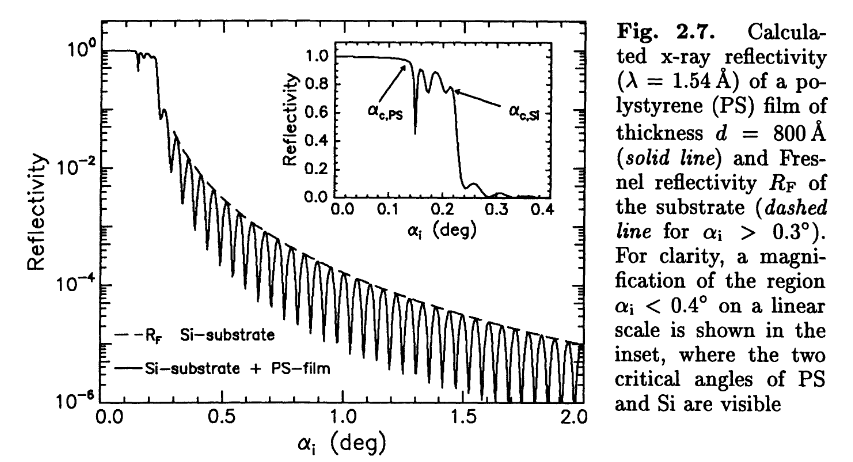

wave layer 0	 [0.00720403+0.j]
wave layer 1	 [9.94352616e-06+0.00829665j]
wave layer 2	 [5.44137012e-05+0.01012581j]
wave layer 3	 [0.00020283+0.01415391j]


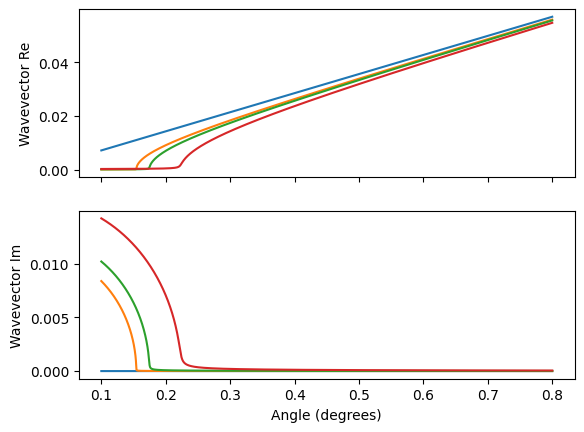

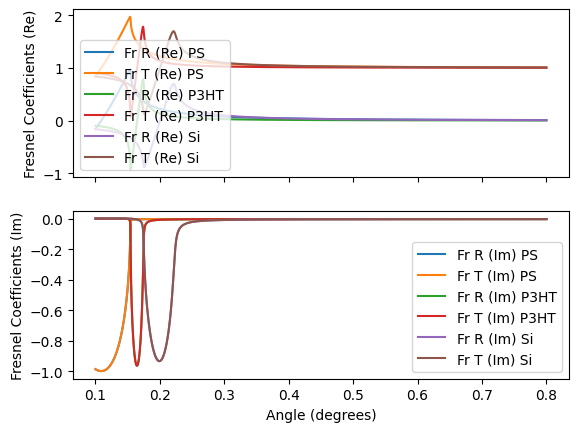

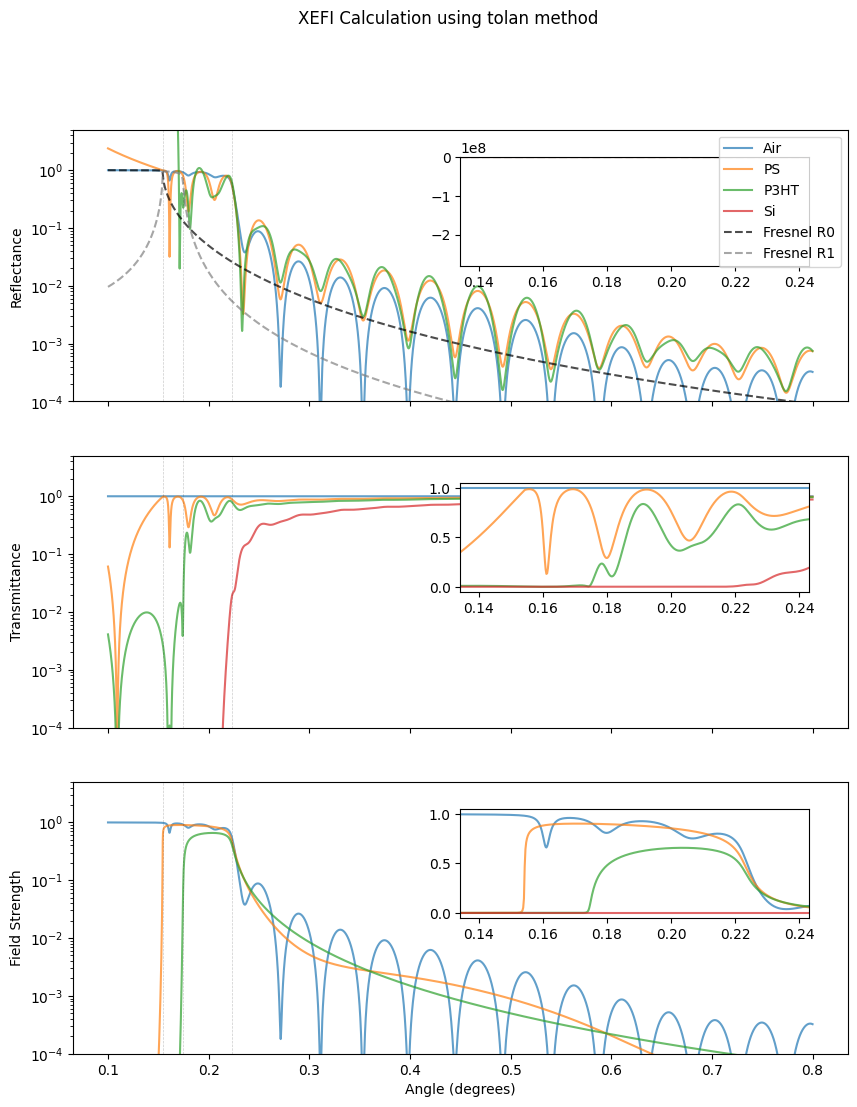

In [14]:
result2 = XEFI.XEF(
    energies=beam_energy,
    angles=angles,
    z=z,
    refractive_indices=refractive_indicies,
    layer_names=labels,
    # method=XEFI.XEF_method.dev
    method=XEFI.XEF_method.tolan,
)

wave layer 0	 [0.00720403+0.j]
wave layer 1	 [9.94352616e-06+0.00829665j]
wave layer 2	 [5.44137012e-05+0.01012581j]
wave layer 3	 [0.00020283+0.01415391j]


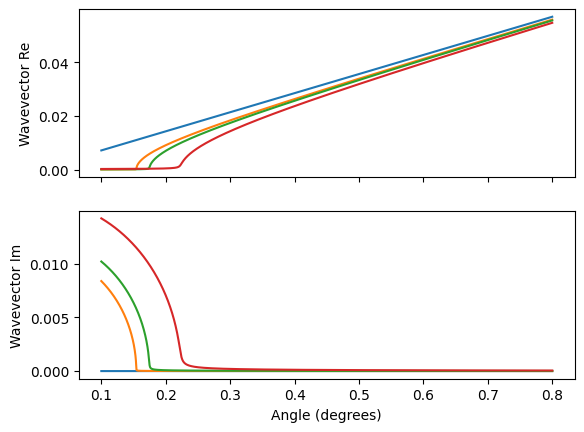

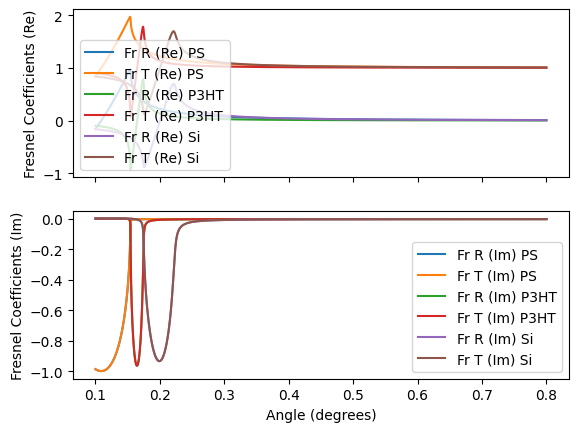

Layer 2: X = [-0.16594997+0.00435467j], 	 a_jp1 = [0.+0.j], 
	 fresnel_r = [-0.16594997+0.00435467j] 	 djp1 = 0
	wave = [0.00020283+0.01415391j]
Layer 1: X = [-0.12093998+0.00238864j], 	 a_jp1 = [0.36327465+0.00197673j], 
	 fresnel_r = [-0.099297+0.00206703j] 	 djp1 = 100.0
	wave = [5.44137012e-05+0.01012581j]
Layer 0: X = [-0.14011546-0.9889374j], 	 a_jp1 = [0.00131049+1.04249535e-05j], 
	 fresnel_r = [-0.14011506-0.98893745j] 	 djp1 = 800.0
	wave = [9.94352616e-06+0.00829665j]
------
Layer 0: T = [1.+0.j], 	 a_jp1 = [0.00131049+1.04249535e-05j],
	 fresnel_t = [0.85988494-0.98893745j] 	 djp1 = 800.0
Layer 0: R = [-0.14011546-0.9889374j], 	 a_jp1 = [0.00131049+1.04249535e-05j],
	 fresnel_r = [-0.14011506-0.98893745j] 	 djp1 = 800.0
Layer 1: T = [0.85988471-0.9889376j], 	 a_jp1 = [0.36327465+0.00197673j],
	 fresnel_t = [0.900703+0.00206703j] 	 djp1 = 100.0
Layer 1: R = [-1.77855278e-07+2.06140788e-07j], 	 a_jp1 = [0.36327465+0.00197673j],
	 fresnel_r = [-0.099297+0.00206703j] 	 djp1 = 1

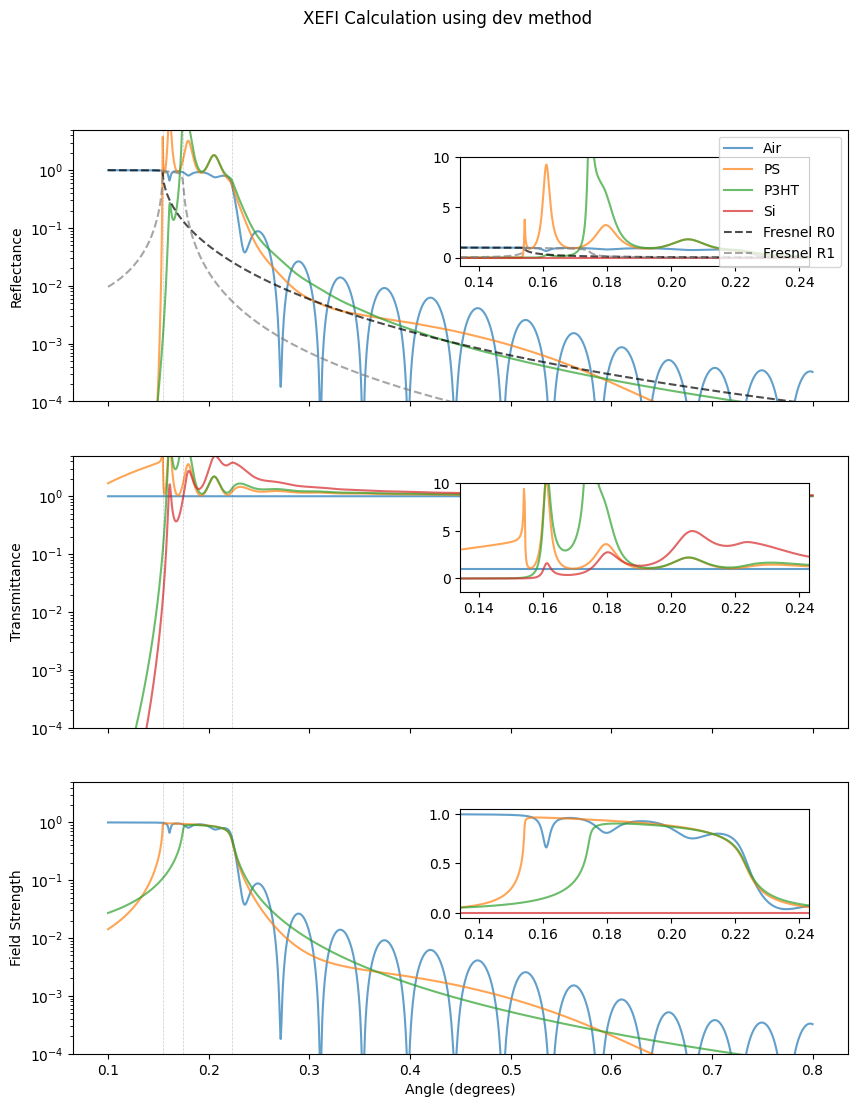

In [15]:
result3 = XEFI.XEF(
    energies=beam_energy,
    angles=angles,
    z=z,
    refractive_indices=refractive_indicies,
    layer_names=labels,
    # method=XEFI.XEF_method.dev
    method=XEFI.XEF_method.dev,
)

T (3000, 4)
R (3000, 4)
i:  0 
Transmission: [0.83595919-0.98955364j 0.83986864-0.99020178j 0.84378725-0.99083543j ...
 1.0088991 -0.03452455j 1.00889311-0.03453442j 1.00888713-0.03454429j] 
Reflection: [-0.92269524-0.44700213j -0.92679033-0.44848542j -0.93103638-0.45008613j
 ...  0.0056362 +0.00837646j  0.00539285+0.00825895j
  0.00515304+0.00813444j] 
Wave: [0.00712092+0.j 0.00713754+0.j 0.00715416+0.j ... 0.05693231+0.j
 0.05694893+0.j 0.05696555+0.j] 
d: [200.         175.97597598 151.95195195 127.92792793 103.9039039
  79.87987988  55.85585586  31.83183183   7.80780781] 
Phase: [[0.-1.42418427e+00j 0.-1.41563061e+00j 0.-1.40707695e+00j ...
  0.-2.13841481e-02j 0.-1.28304889e-02j 0.-4.27682963e-03j]
 [0.-1.42750847e+00j 0.-1.41893484e+00j 0.-1.41036122e+00j ...
  0.-2.14340611e-02j 0.-1.28604366e-02j 0.-4.28681222e-03j]
 [0.-1.43083267e+00j 0.-1.42223908e+00j 0.-1.41364549e+00j ...
  0.-2.14839740e-02j 0.-1.28903844e-02j 0.-4.29679480e-03j]
 ...
 [0.-1.13864620e+01j 0.-1.13180748e+

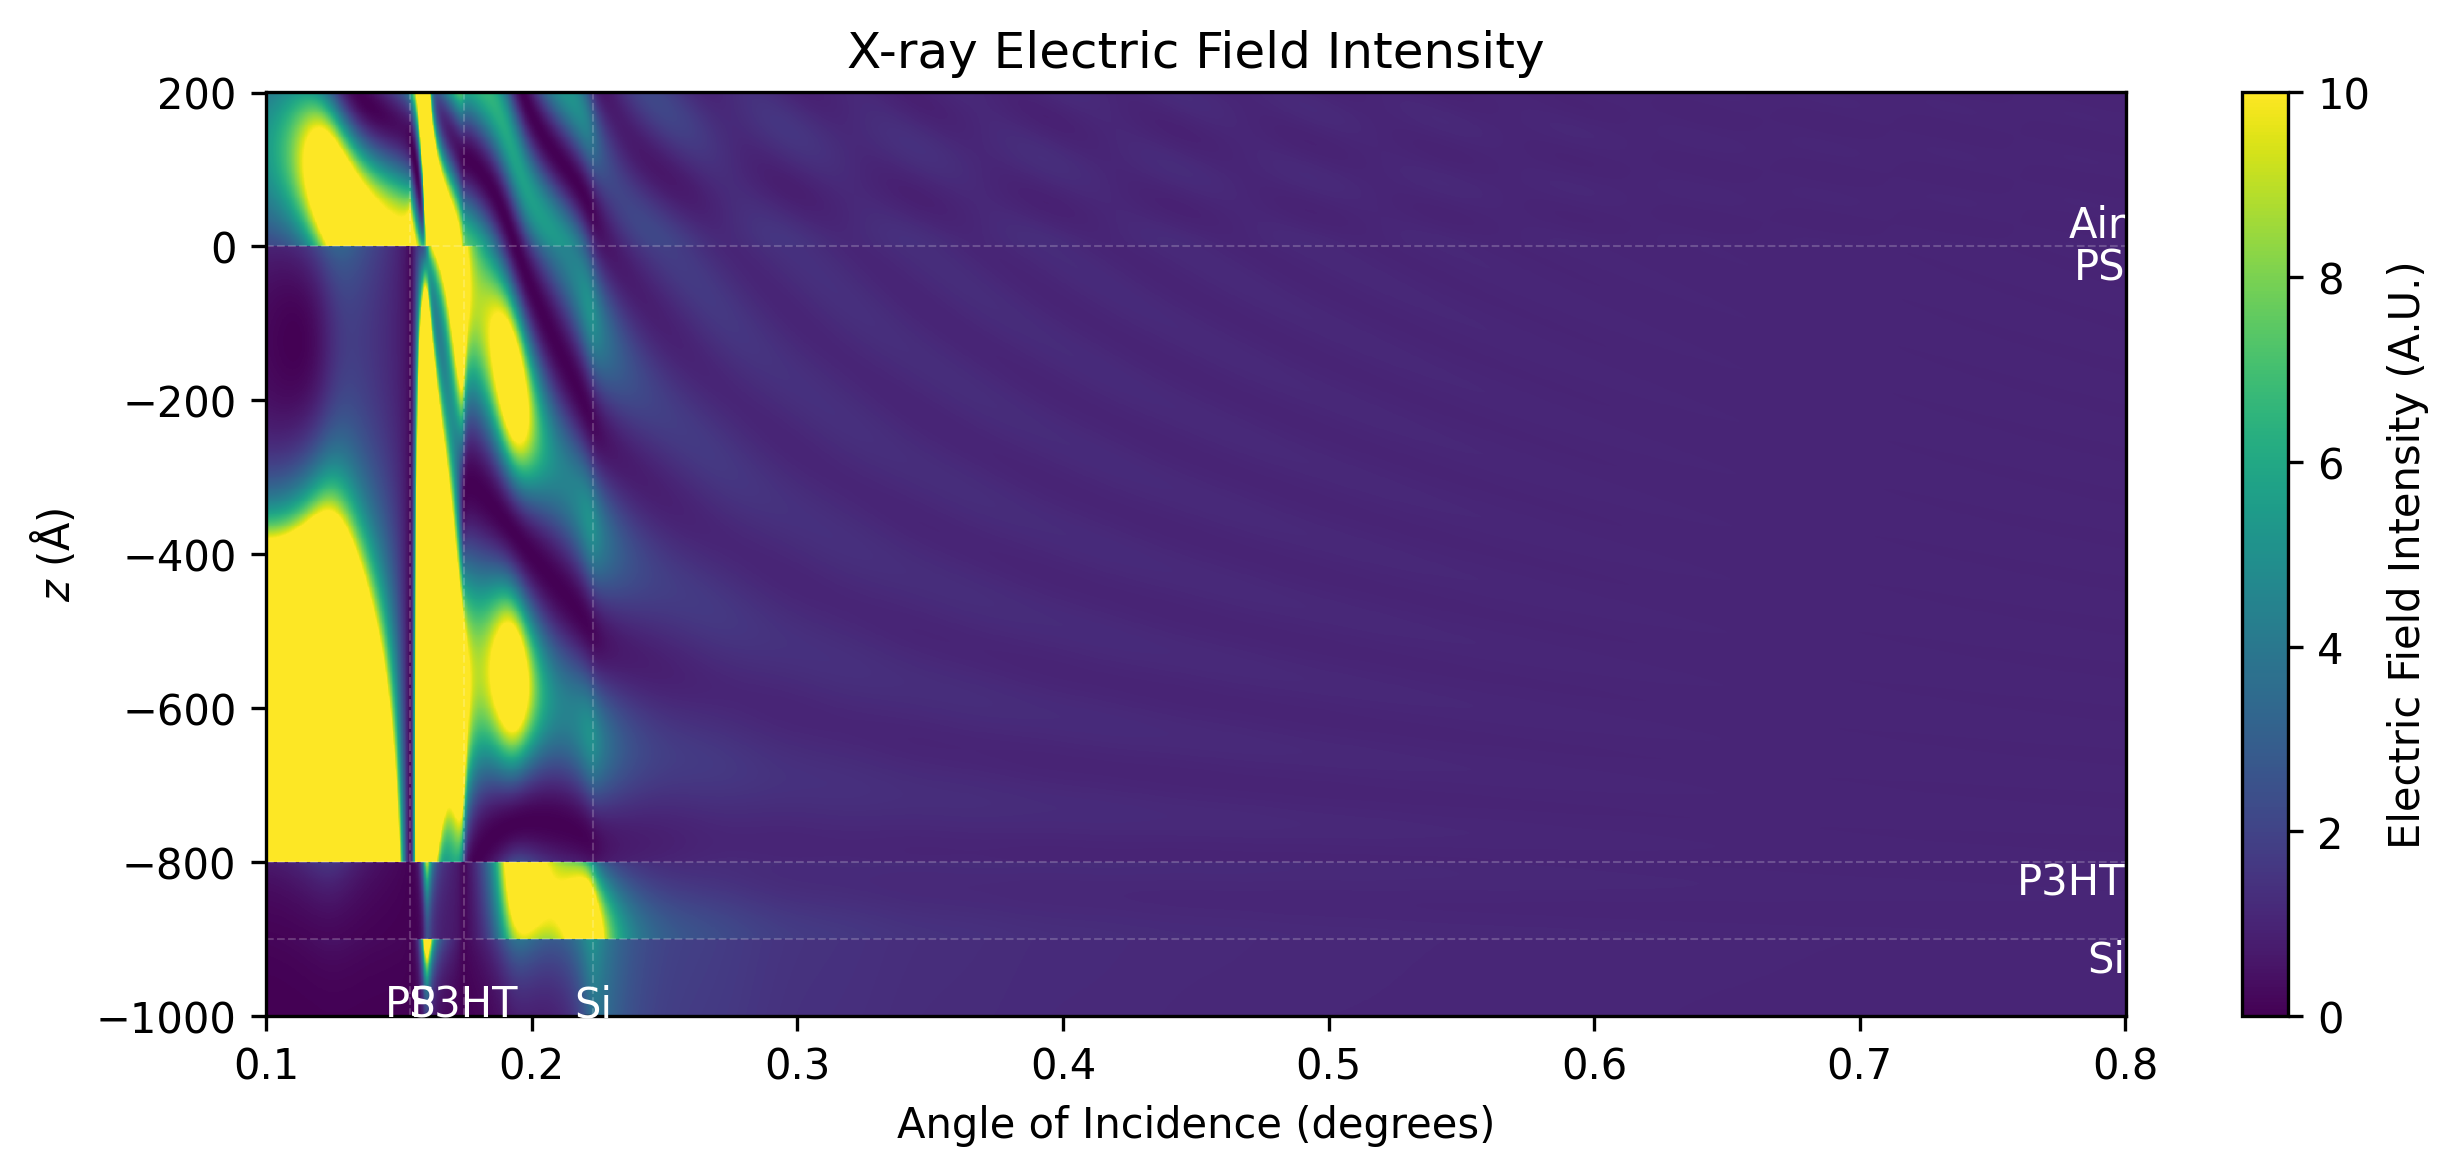

In [16]:
z_vals = np.linspace(200, -1000, 1000)
import matplotlib.colors as mc

# norm = mc.LogNorm(vmin=1e-6, vmax=10)
norm = mc.Normalize(vmin=0, vmax=10)
fig, ax = result.generate_pretty_figure_XEFI(z_vals, norm=norm)

T (3000, 4)
R (3000, 4)
i:  0 
Transmission: [0.99999085-0.00427682j 0.99999081-0.0042868j  0.99999077-0.00429678j ...
 0.99941546-0.03418692j 0.99941512-0.03419689j 0.99941477-0.03420687j] 
Reflection: [-0.1555984 -0.98664378j -0.15166389-0.98725149j -0.14772032-0.98784449j
 ...  0.01789604+0.00255364j  0.01782205+0.00280651j
  0.01774044+0.00305726j] 
Wave: [0.00712092+0.j 0.00713754+0.j 0.00715416+0.j ... 0.05693231+0.j
 0.05694893+0.j 0.05696555+0.j] 
d: [200.         175.97597598 151.95195195 127.92792793 103.9039039
  79.87987988  55.85585586  31.83183183   7.80780781] 
Phase: [[0.-1.42418427e+00j 0.-1.41563061e+00j 0.-1.40707695e+00j ...
  0.-2.13841481e-02j 0.-1.28304889e-02j 0.-4.27682963e-03j]
 [0.-1.42750847e+00j 0.-1.41893484e+00j 0.-1.41036122e+00j ...
  0.-2.14340611e-02j 0.-1.28604366e-02j 0.-4.28681222e-03j]
 [0.-1.43083267e+00j 0.-1.42223908e+00j 0.-1.41364549e+00j ...
  0.-2.14839740e-02j 0.-1.28903844e-02j 0.-4.29679480e-03j]
 ...
 [0.-1.13864620e+01j 0.-1.13180748e+

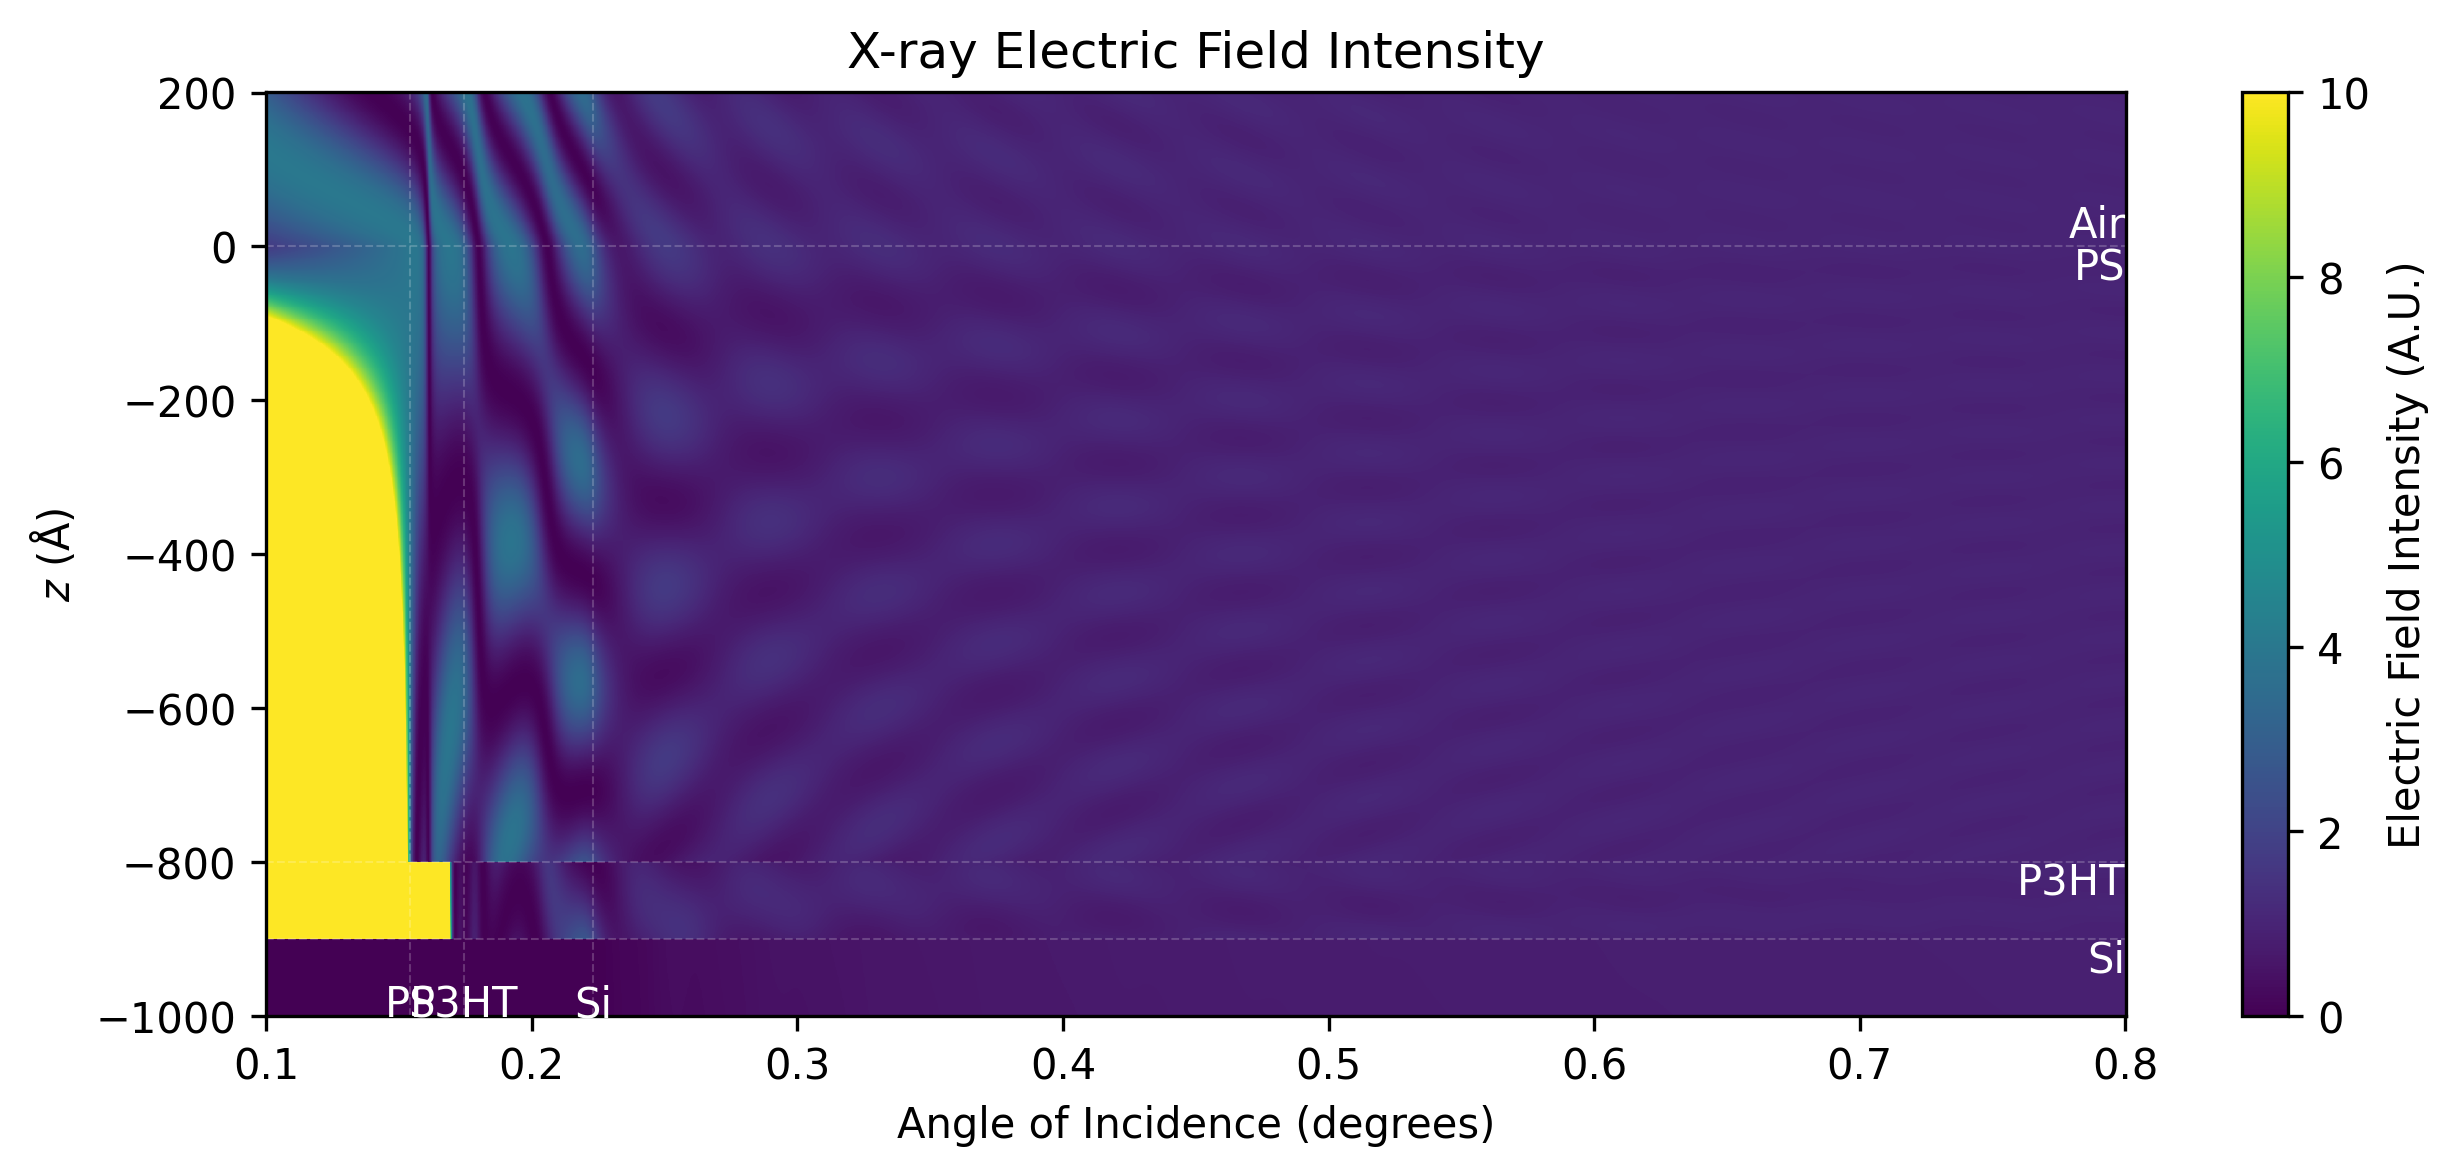

In [17]:
z_vals = np.linspace(200, -1000, 1000)
import matplotlib.colors as mc

# norm = mc.LogNorm(vmin=1e-6, vmax=10)
norm = mc.Normalize(vmin=0, vmax=10)
fig, ax = result2.generate_pretty_figure_XEFI(z_vals, norm=norm)

In [18]:
result3.T[500, 1], result3.R[500, 1]

(np.complex128(1.0416176005375701+0.08047809328205373j),
 np.complex128(0.763073310910544-0.4603511492545339j))

In [19]:
result3.T[500, 0], result3.R[500, 0]

(np.complex128(1+0j), np.complex128(0.8046909114481143-0.3798730559724803j))

T (3000, 4)
R (3000, 4)
i:  0 
Transmission: [0.99999085-0.00427682j 0.99999081-0.0042868j  0.99999077-0.00429678j ...
 0.99941546-0.03418692j 0.99941512-0.03419689j 0.99941477-0.03420687j] 
Reflection: [-0.1555984 -0.98664378j -0.15166389-0.98725149j -0.14772032-0.98784449j
 ...  0.01789604+0.00255364j  0.01782205+0.00280651j
  0.01774044+0.00305726j] 
Wave: [0.00712092+0.j 0.00713754+0.j 0.00715416+0.j ... 0.05693231+0.j
 0.05694893+0.j 0.05696555+0.j] 
d: [200.         175.97597598 151.95195195 127.92792793 103.9039039
  79.87987988  55.85585586  31.83183183   7.80780781] 
Phase: [[0.-1.42418427e+00j 0.-1.41563061e+00j 0.-1.40707695e+00j ...
  0.-2.13841481e-02j 0.-1.28304889e-02j 0.-4.27682963e-03j]
 [0.-1.42750847e+00j 0.-1.41893484e+00j 0.-1.41036122e+00j ...
  0.-2.14340611e-02j 0.-1.28604366e-02j 0.-4.28681222e-03j]
 [0.-1.43083267e+00j 0.-1.42223908e+00j 0.-1.41364549e+00j ...
  0.-2.14839740e-02j 0.-1.28903844e-02j 0.-4.29679480e-03j]
 ...
 [0.-1.13864620e+01j 0.-1.13180748e+

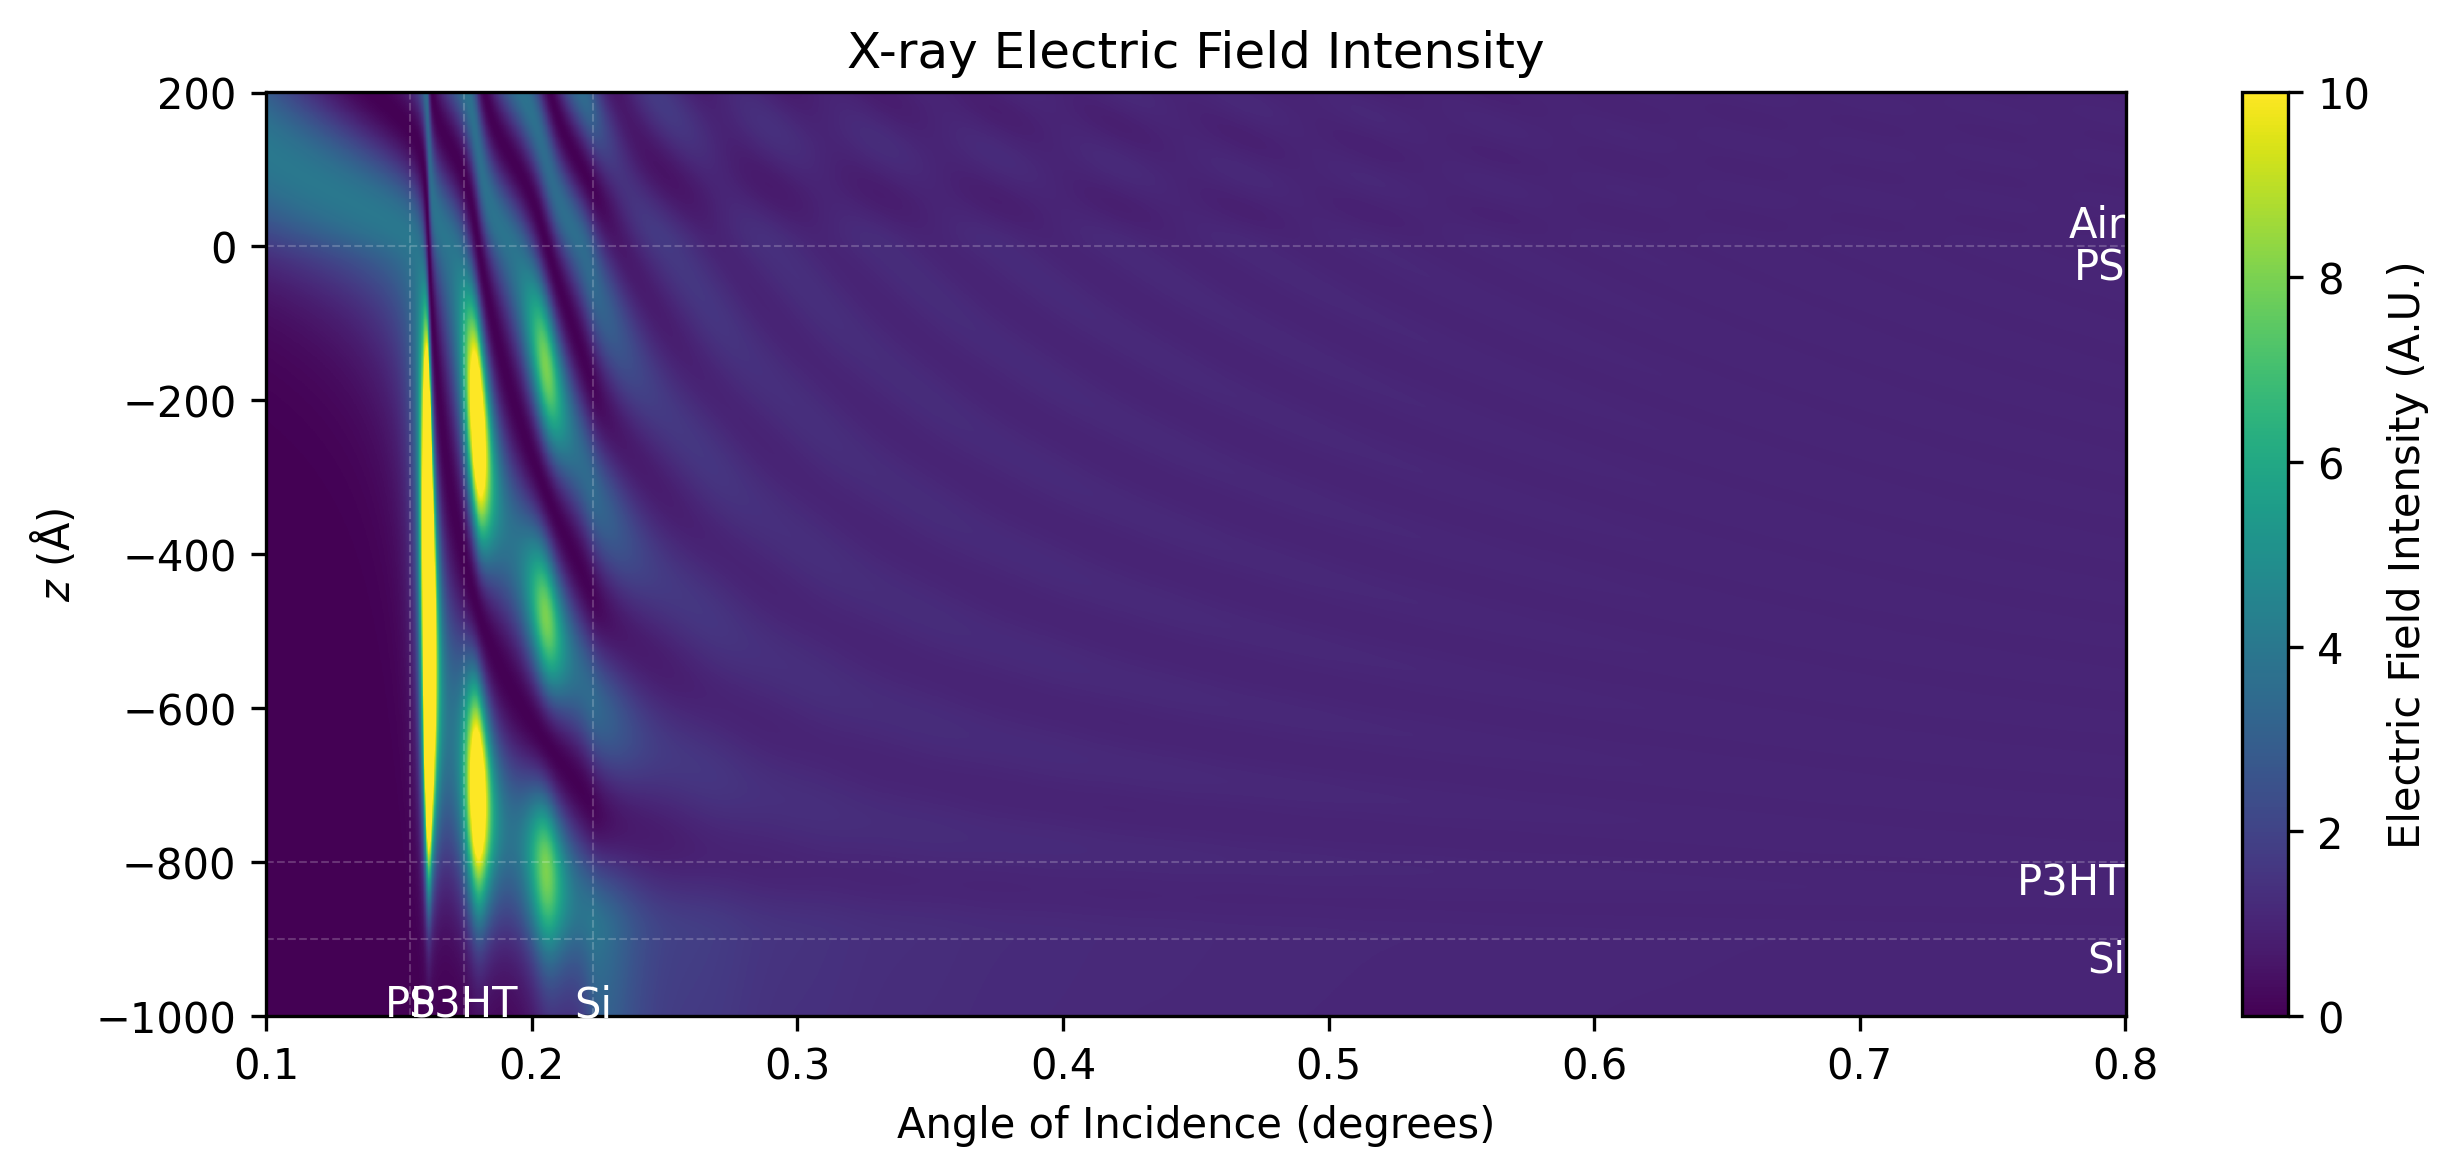

In [20]:
z_vals = np.linspace(200, -1000, 1000)
import matplotlib.colors as mc

# norm = mc.LogNorm(vmin=1e-6, vmax=10)
norm = mc.Normalize(vmin=0, vmax=10)
fig, ax = result3.generate_pretty_figure_XEFI(z_vals, norm=norm)